# Loan Repayment Prediction

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import accuracy_score , precision_score , recall_score,confusion_matrix,classification_report,f1_score

#### Reading file

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
# Consise Summery

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [4]:
# Summery
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

#### Checking For Null Values


In [5]:
df.isnull().sum().sum()

0

Our DataFrame contain **Zero** Null values.
<br><br>
Now lets solve the problem with **Purpose** Attribute.

In [6]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

credit.policy
1    7710
0    1868
Name: count, dtype: int64


purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64


installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: count, Length: 4788, dtype: int64


log.annual.inc
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: count, Length: 1987, dtype: int64


dti
0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
    

In [7]:
# unique values in purpose attribute

df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

It has **6 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [8]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

## Data Visualization

Text(0.5, 0, 'FICO')

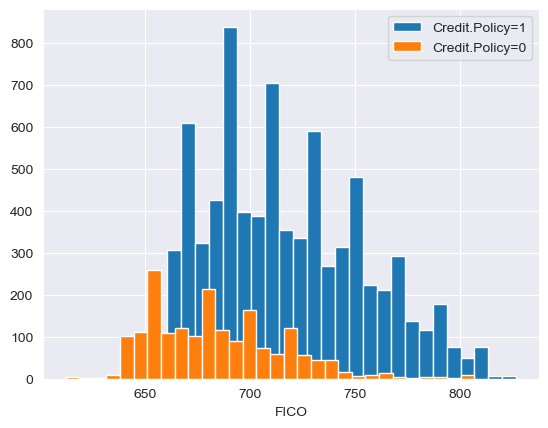

In [9]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

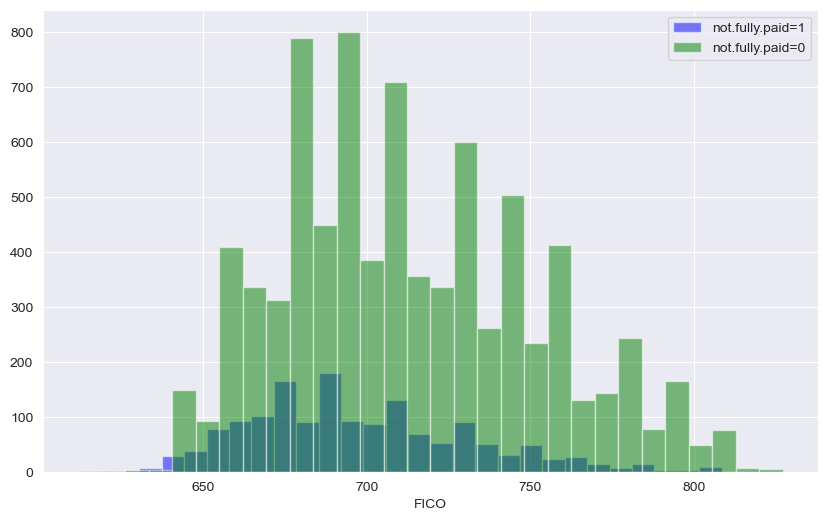

In [10]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

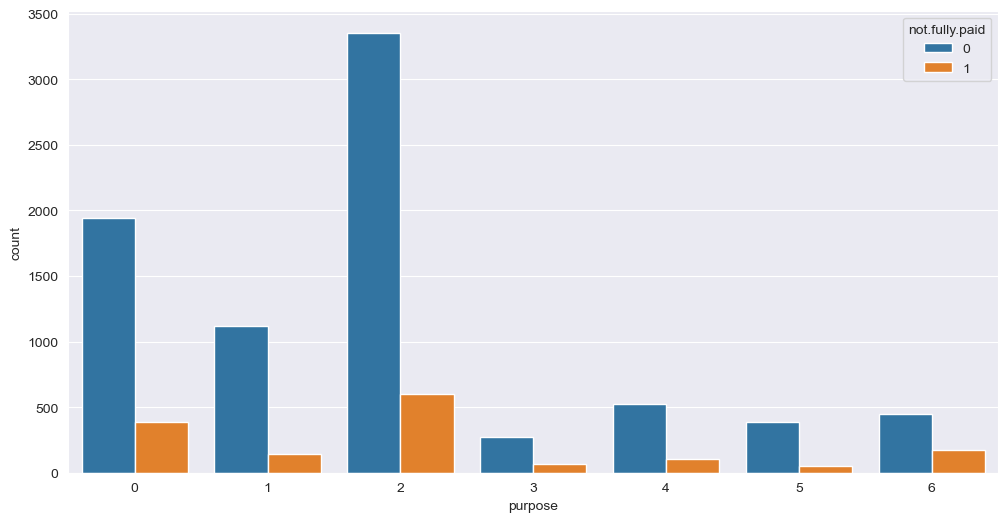

In [11]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<Figure size 1000x600 with 0 Axes>

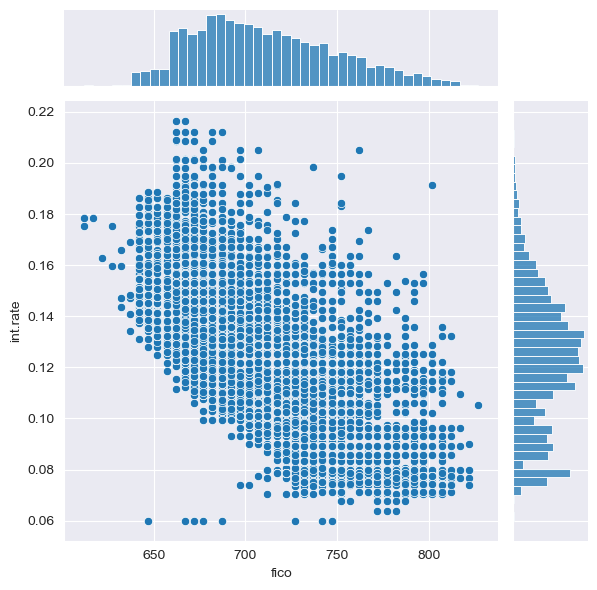

In [12]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

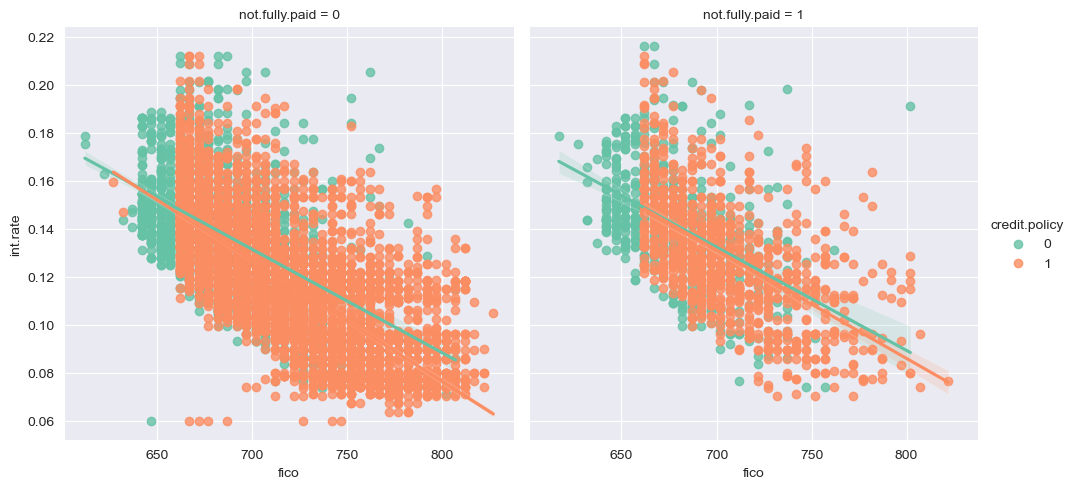

In [13]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

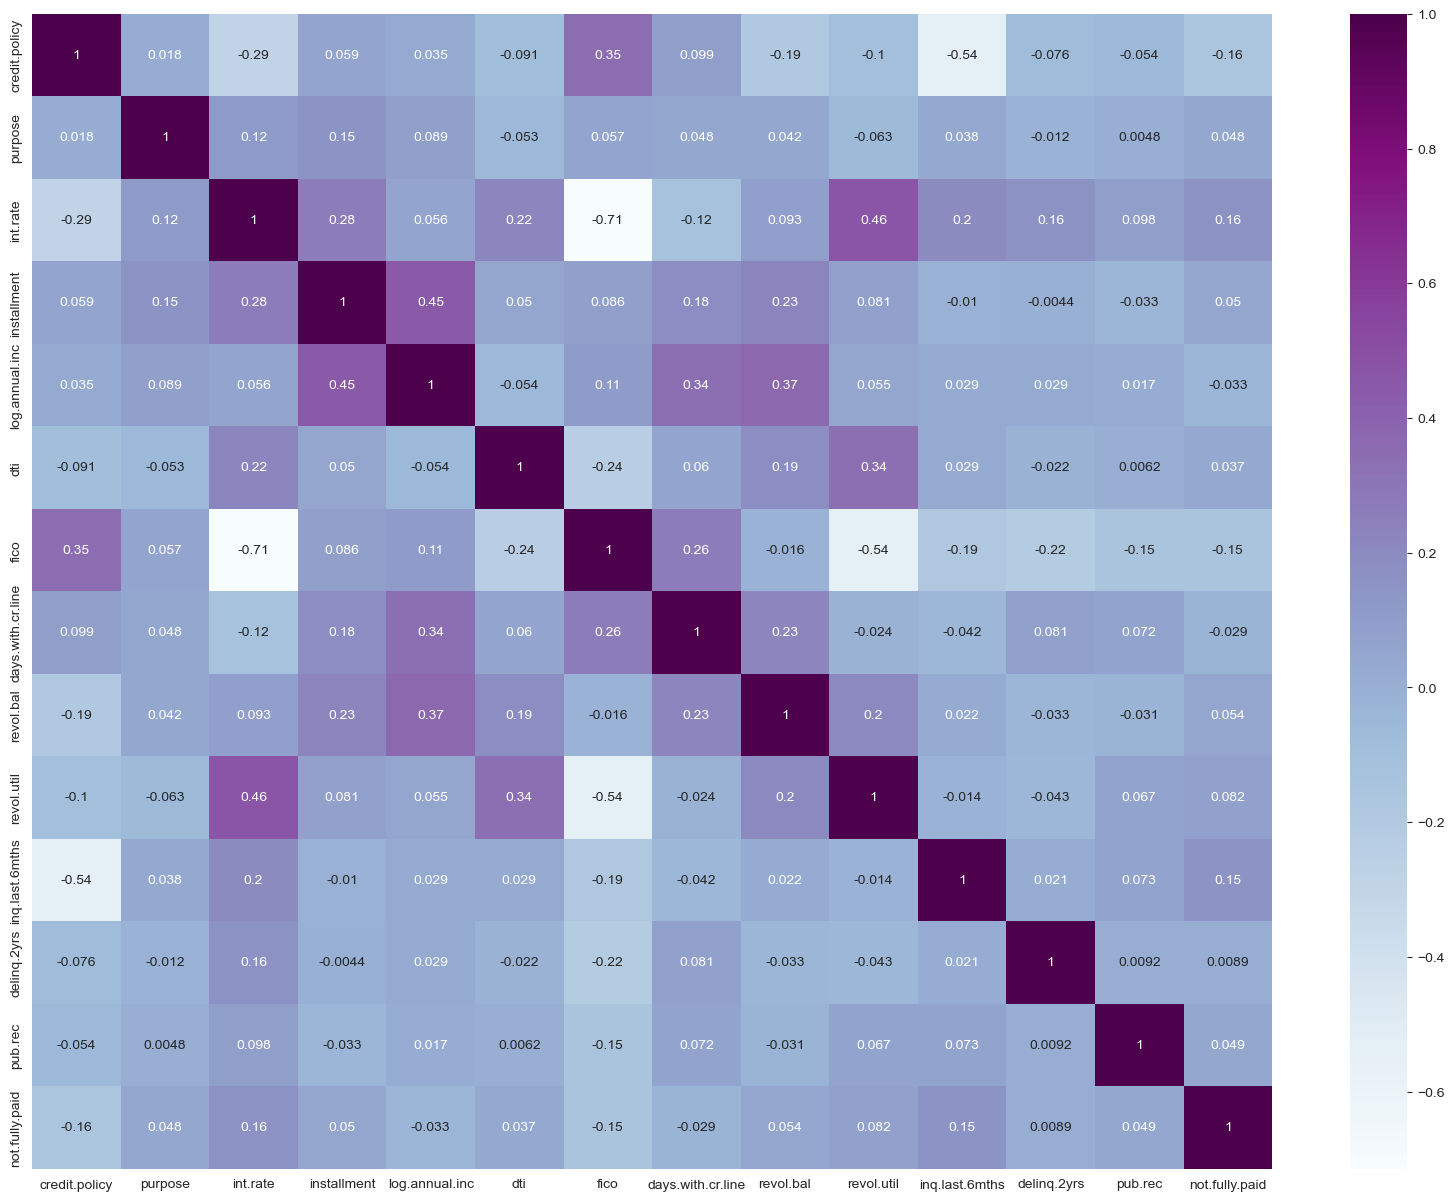

In [14]:
plt.figure(figsize = (20, 15)) 
sns.heatmap(df.corr(), cmap='BuPu', annot=True)
plt.show()

We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [15]:
# Dropping target class

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3, 4,5,6,7,8,9,10,11,13,15,20]}

grid_search = GridSearchCV(dt_clf, 
                           param_grid, scoring = 'recall_weighted',
                           cv=kFold,
                           return_train_score=True)
grid_search.fit(X_train,y_train)

NameError: name 'kFold' is not defined

In [ ]:
grid_search.best_params_

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(X_train, y_train)
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(X_train,y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",(maxaccu)*100,"on Random State =",maxRS)

Best accuracy is  85.28183716075156 on Random State = 108


In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

We got **Accuracy of 84.58%** using Decision Tree Classifier.

### **Bagging** with Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
bag_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100,bootstrap=True)
score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Bagging is not improving the score of model and giving only **73.10% of mean Score.**

### **AdaBoosting** with Decision Tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=2), learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

It giving the same result of **84%** and not improving our Model.

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

We got the **Accuracy of 84.7%** with random Forest Classifier

### AdaBoosting with RandomForest

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
#print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
#print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))
y_pred_train = adaboost_clf.predict(X_train)
y_pred_test = adaboost_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
#print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
#print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
import plotly.graph_objects as go

In [ ]:
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_test))
print("\n")
print("<-------------------Classification Report---------------------->\n")
print(classification_report(y_test,y_pred_test))
print("\n")
print("<---------------Accuracy Scores------------------->\n")
#print('Train Accuracy score: ',train_accuracy)
print('Test Accuracy score:',test_accuracy)

While Computing different **Ensemble Learning Technologies**, We Found that Most of the **Bagging and Boosting** algo are giving similar result with minimum difference in accuracy. Even though in all these Ensembles-

We Found that the **Best Model for this DataSet is Random Forest with Accuracy of 85%.**

In [19]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ET_model = ExtraTreeClassifier()
ETs_model = ExtraTreesClassifier()
BNB_model = BernoulliNB()
GNB_model = GaussianNB()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model,ET_model,ETs_model,GNB_model,BNB_model ]

Accuracy_Score of  LogisticRegression() is 84.51635351426583
F1 SCore                 0.8908685968819599
Confusion Matrix of  LogisticRegression()  is 
 [[2427    0]
 [ 445    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2427
           1       1.00      0.00      0.01       447

    accuracy                           0.85      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.87      0.85      0.77      2874



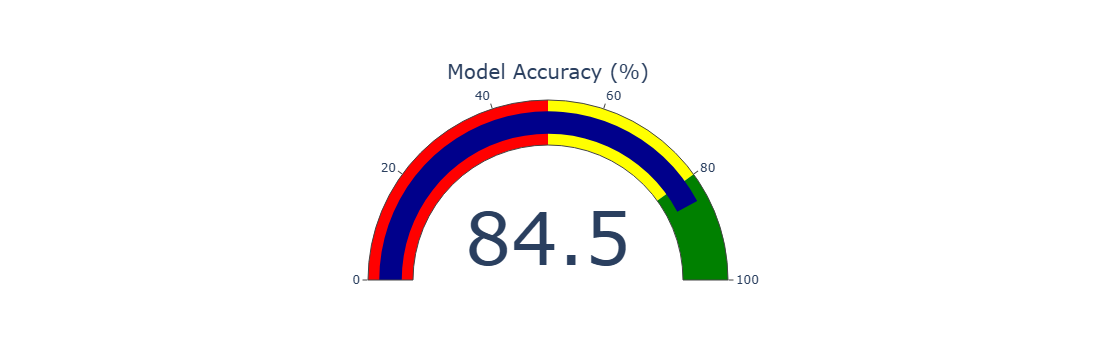

**************************************************
Accuracy_Score of  RidgeClassifier() is 84.44676409185804
F1 SCore                 0.8869179600886918
Confusion Matrix of  RidgeClassifier()  is 
 [[2425    2]
 [ 445    2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2427
           1       0.50      0.00      0.01       447

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.79      0.84      0.77      2874



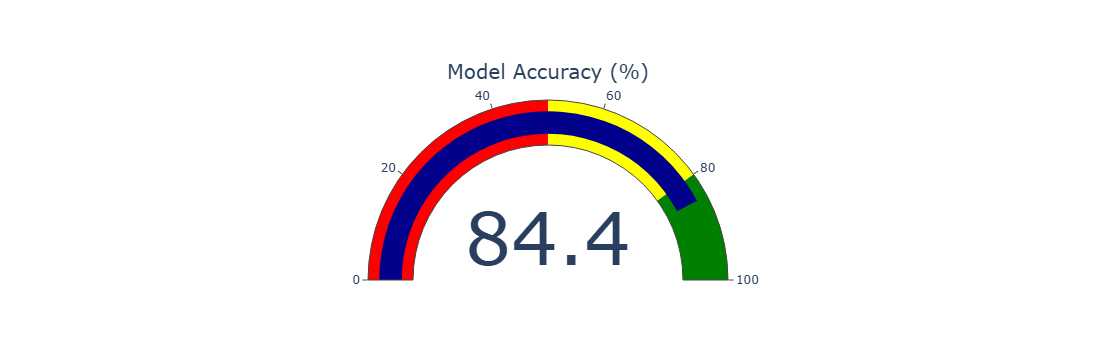

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 74.28670842032011
F1 SCore                 22.940563086548487
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[2025  402]
 [ 337  110]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2427
           1       0.21      0.25      0.23       447

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



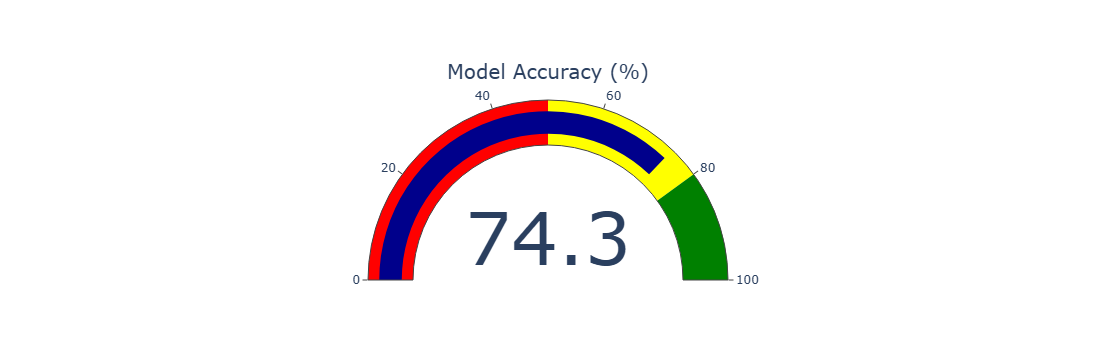

**************************************************
Accuracy_Score of  SVC() is 84.44676409185804
F1 SCore                 0.0
Confusion Matrix of  SVC()  is 
 [[2427    0]
 [ 447    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2427
           1       0.00      0.00      0.00       447

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



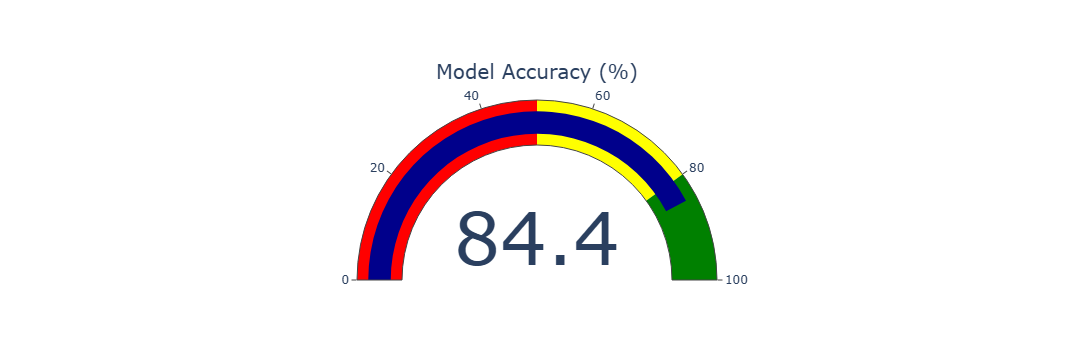

**************************************************
Accuracy_Score of  KNeighborsClassifier() is 81.69798190675017
F1 SCore                 5.39568345323741
Confusion Matrix of  KNeighborsClassifier()  is 
 [[2333   94]
 [ 432   15]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2427
           1       0.14      0.03      0.05       447

    accuracy                           0.82      2874
   macro avg       0.49      0.50      0.48      2874
weighted avg       0.73      0.82      0.77      2874



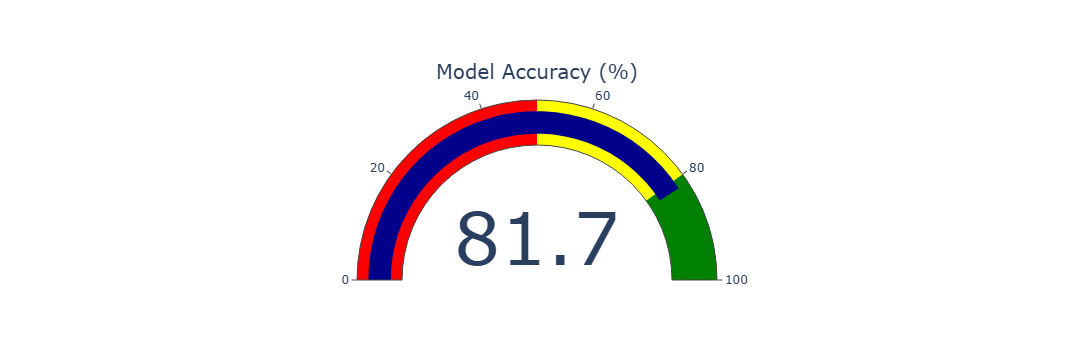

**************************************************
Accuracy_Score of  RandomForestClassifier() is 84.27279053583855
F1 SCore                 2.1645021645021645
Confusion Matrix of  RandomForestClassifier()  is 
 [[2417   10]
 [ 442    5]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.91      2427
           1       0.33      0.01      0.02       447

    accuracy                           0.84      2874
   macro avg       0.59      0.50      0.47      2874
weighted avg       0.77      0.84      0.78      2874



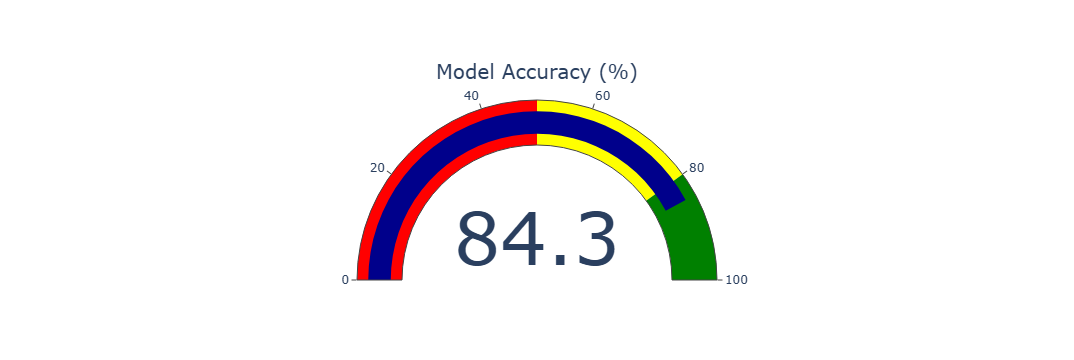

**************************************************
Accuracy_Score of  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) is 82.84620737647877
F1 SCore                 12.433392539964476
Confusion Matrix of  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_b

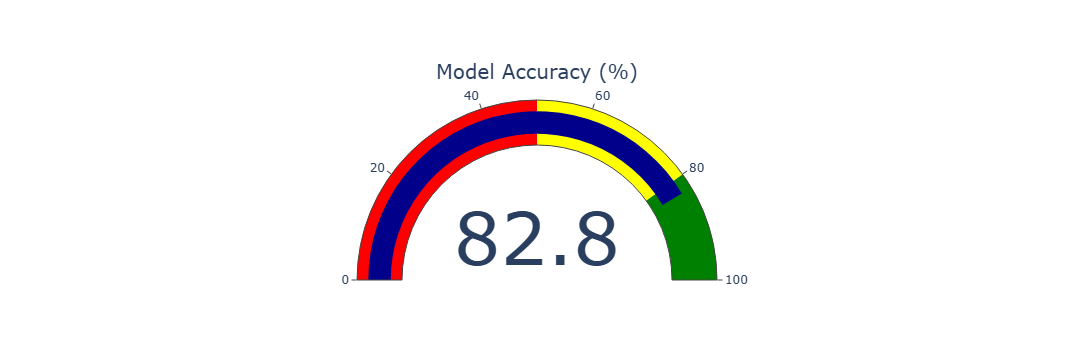

**************************************************
Accuracy_Score of  SGDClassifier() is 84.44676409185804
F1 SCore                 0.0
Confusion Matrix of  SGDClassifier()  is 
 [[2427    0]
 [ 447    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2427
           1       0.00      0.00      0.00       447

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



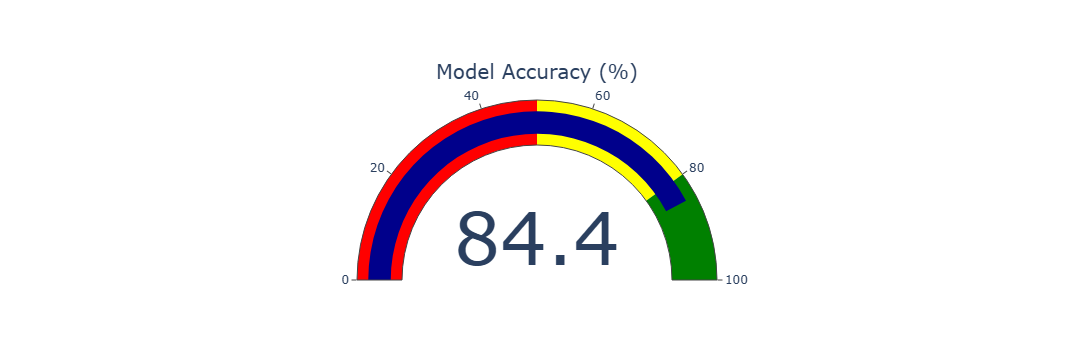

**************************************************
Accuracy_Score of  BaggingClassifier() is 83.22894919972164
F1 SCore                 10.408921933085502
Confusion Matrix of  BaggingClassifier()  is 
 [[2364   63]
 [ 419   28]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2427
           1       0.31      0.06      0.10       447

    accuracy                           0.83      2874
   macro avg       0.58      0.52      0.51      2874
weighted avg       0.77      0.83      0.78      2874



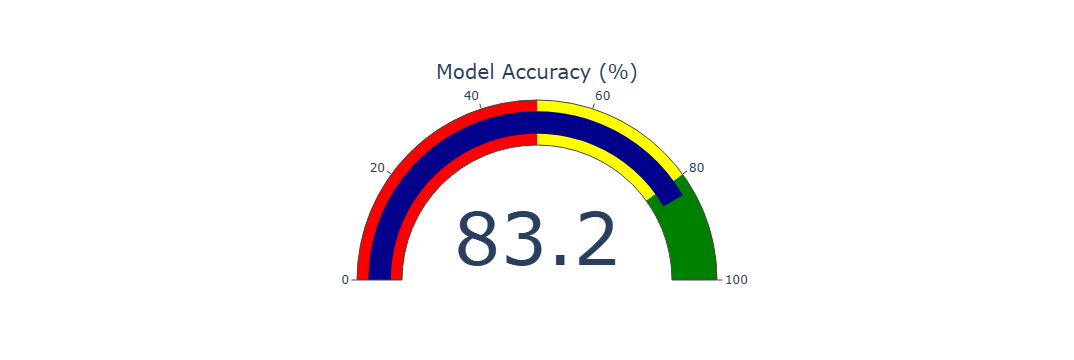

**************************************************
Accuracy_Score of  AdaBoostClassifier() is 84.13361169102296
F1 SCore                 4.201680672268908
Confusion Matrix of  AdaBoostClassifier()  is 
 [[2408   19]
 [ 437   10]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2427
           1       0.34      0.02      0.04       447

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.48      2874
weighted avg       0.77      0.84      0.78      2874



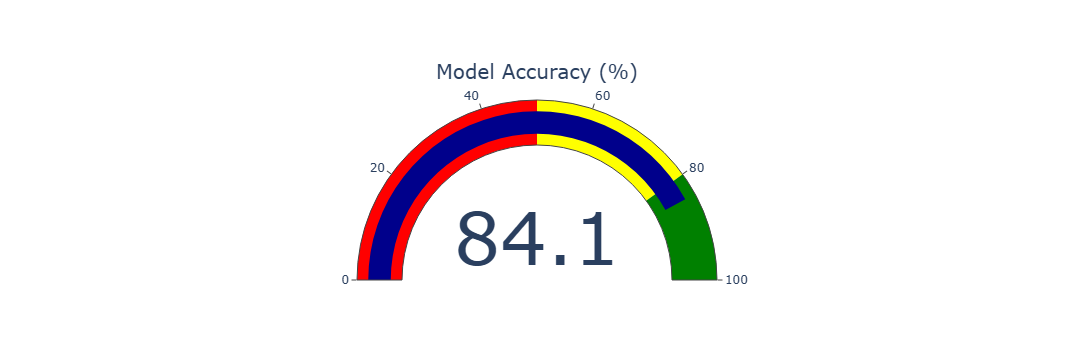

**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 84.58594293667363
F1 SCore                 7.127882599580712
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[2414   13]
 [ 430   17]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2427
           1       0.57      0.04      0.07       447

    accuracy                           0.85      2874
   macro avg       0.71      0.52      0.49      2874
weighted avg       0.80      0.85      0.78      2874



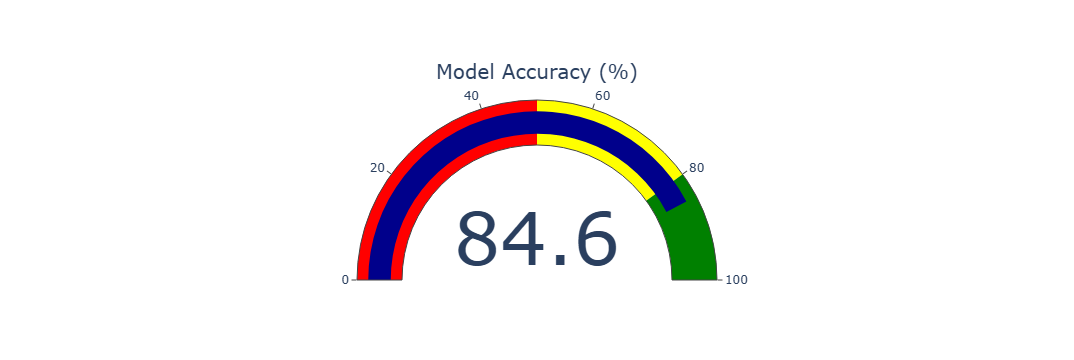

**************************************************
Accuracy_Score of  ExtraTreeClassifier() is 74.53027139874739
F1 SCore                 22.45762711864407
Confusion Matrix of  ExtraTreeClassifier()  is 
 [[2036  391]
 [ 341  106]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2427
           1       0.21      0.24      0.22       447

    accuracy                           0.75      2874
   macro avg       0.53      0.54      0.54      2874
weighted avg       0.76      0.75      0.75      2874



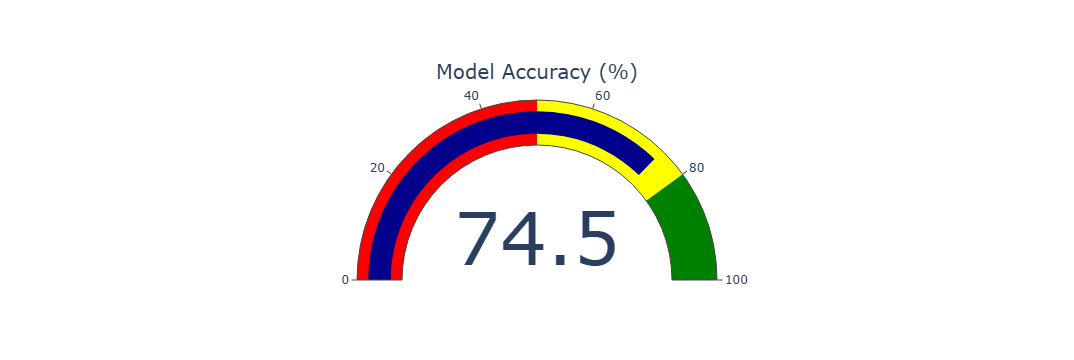

**************************************************
Accuracy_Score of  ExtraTreesClassifier() is 84.16840640222686
F1 SCore                 2.9850746268656714
Confusion Matrix of  ExtraTreesClassifier()  is 
 [[2412   15]
 [ 440    7]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2427
           1       0.32      0.02      0.03       447

    accuracy                           0.84      2874
   macro avg       0.58      0.50      0.47      2874
weighted avg       0.76      0.84      0.78      2874



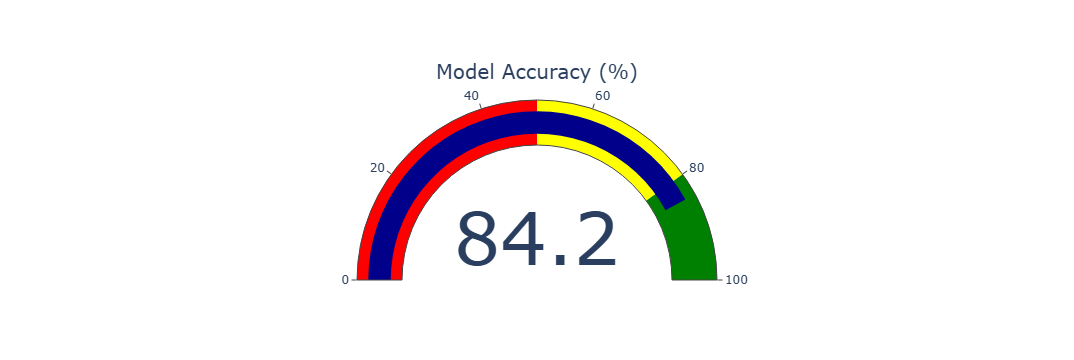

**************************************************
Accuracy_Score of  GaussianNB() is 82.88100208768267
F1 SCore                 13.380281690140844
Confusion Matrix of  GaussianNB()  is 
 [[2344   83]
 [ 409   38]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2427
           1       0.31      0.09      0.13       447

    accuracy                           0.83      2874
   macro avg       0.58      0.53      0.52      2874
weighted avg       0.77      0.83      0.79      2874



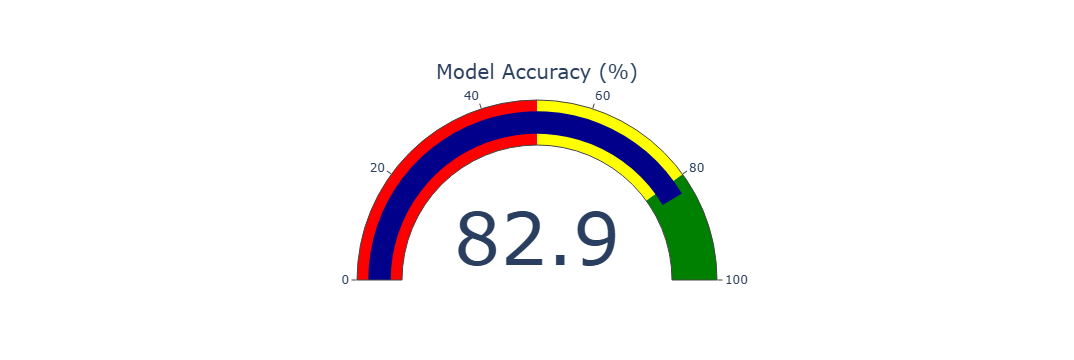

**************************************************
Accuracy_Score of  BernoulliNB() is 84.44676409185804
F1 SCore                 0.0
Confusion Matrix of  BernoulliNB()  is 
 [[2427    0]
 [ 447    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      2427
           1       0.00      0.00      0.00       447

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874



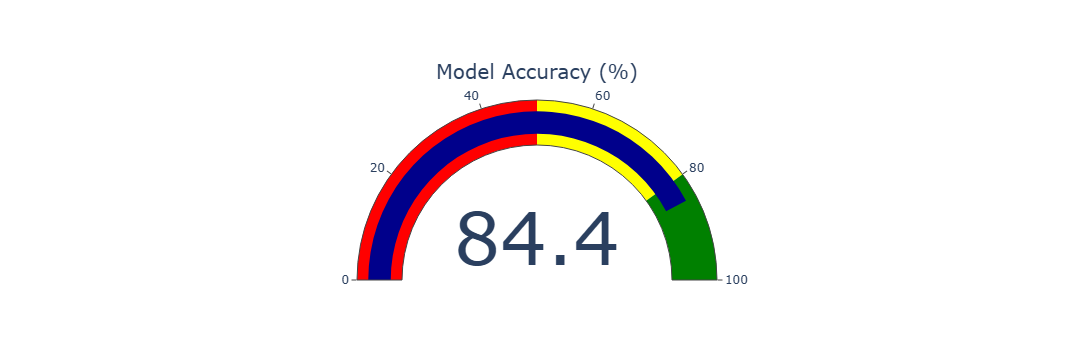

**************************************************


Model  Accuracy  \
0                                LogisticRegression()     84.52   
1                                   RidgeClassifier()     84.45   
2                            DecisionTreeClassifier()     74.29   
3                                               SVC()     84.45   
4                              KNeighborsClassifier()     81.70   
5   (DecisionTreeClassifier(max_features='sqrt', r...     84.27   
6   XGBClassifier(base_score=None, booster=None, c...     82.85   
7                                     SGDClassifier()     84.45   
8   (DecisionTreeClassifier(random_state=135711860...     83.23   
9   (DecisionTreeClassifier(max_depth=1, random_st...     84.13   
10  ([DecisionTreeRegressor(criterion='friedman_ms...     84.59   
11                              ExtraTreeClassifier()     74.53   
12  (ExtraTreeClassifier(random_state=1315918892),...     84.17   
13                                       GaussianNB()     82.88   
14                                      BernoulliNB()     84.45   

                                     F1 Score  
0   <function f1_score at 0x000001E396B196C0>  
1   <function f1_score at 0x000001E396B196C0>  
2   <function f1_score at 0x000001E396B196C0>  
3   <function f1_score at 0x000001E396B196C0>  
4   <function f1_score at 0x000001E396B196C0>  
5   <function f1_score at 0x000001E396B196C0>  
6   <function f1_score at 0x000001E396B196C0>  
7   <function f1_score at 0x000001E396B196C0>  
8   <function f1_score at 0x000001E396B196C0>  
9   <function f1_score at 0x000001E396B196C0>  
10  <function f1_score at 0x000001E396B196C0>  
11  <function f1_score at 0x000001E396B196C0>  
12  <function f1_score at 0x000001E396B196C0>  
13  <function f1_score at 0x000001E396B196C0>  
14  <function f1_score at 0x000001E396B196C0>

In [20]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))

    # Gauge meter
    metric_value = accuracy_score(y_test,pred)*100
    fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
    ))

# Display the gauge
    fig.show()
    

    print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1_score})

In [21]:
GB_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [22]:
parameters ={'ccp_alpha': [0.0],
 'criterion': ['friedman_mse'],
 'init': [None],
 'learning_rate': [0.1],
 'loss': ['log_loss'],
 'max_depth': [3],
 'max_features': [None],
 'max_leaf_nodes': [None],
 'min_impurity_decrease': [0.0],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [100],
 'n_iter_no_change': [None],
 'random_state': [None],
 'subsample': [1.0],
 'tol': [0.0001],
 'validation_fraction': [0.1],
 'verbose': [0],
 'warm_start': [False]}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
GCV = GridSearchCV(GB_model,parameters,cv=5)

In [25]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['friedman_mse'],
                         'init': [None], 'learning_rate': [0.1],
                         'loss': ['log_loss'], 'max_depth': [3],
                         'max_features': [None], 'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_iter_no_change': [None],
                         'random_state': [None], 'subsample': [1.0],
                         'tol': [0.0001], 'validation_fraction': [0.1],
                         'verbose': [0], 'warm_start': [False]})

In [26]:
GCV.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [27]:
GCV.best_estimator_

GradientBoostingClassifier()

In [28]:
Pred = GCV.best_estimator_.predict(X_test)
print(accuracy_score(y_test,Pred)*100)

84.58594293667363


<Axes: >

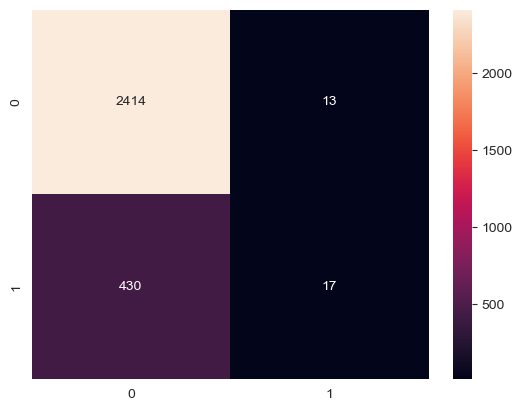

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,Pred),annot=True, fmt='d')

In [30]:
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay,auc

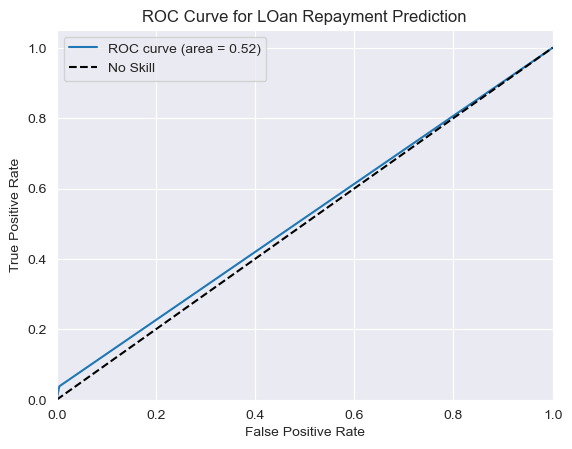

In [31]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,Pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LOan Repayment Prediction')
plt.legend()
plt.show()

In [32]:
import joblib
joblib.dump(GB_model,'Loan.pkl')

['Loan.pkl']

In [33]:
a = np.array(y_test)
df = pd.DataFrame()
df['Prediction'] = Pred
df['original'] = a
df

Prediction  original
0              0         0
1              0         0
2              0         0
3              0         0
4              0         0
...          ...       ...
2869           0         0
2870           0         1
2871           0         0
2872           0         0
2873           0         0

[2874 rows x 2 columns]

In [34]:
metric_value = accuracy_score(y_test,Pred) * 100  # Example for accuracy

# Create the gauge meter
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
))

# Display the gauge
fig.show()